In [ ]:
# Importing packages

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from datetime import datetime

In [ ]:
# Importing Data from local directory

In [50]:
df_mvc = pd.read_csv("C://Users//ramsu//Downloads//Motor_Vehicle_Collisions_-_Vehicles.csv", low_memory = False)
df_mvc

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704401,20083223,4466593,10/11/2021,11:00,517fa844-84ac-4a52-aa06-b6b62c59903e,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified
3704402,20083044,4466424,10/11/2021,7:15,10f6574c-8056-43ab-bfab-9162e074001a,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2011.0,...,Parked,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,N,NaN,Unspecified,Unspecified
3704403,20081526,4465968,10/11/2021,0:15,28cee7e8-669b-4888-997c-994702e81803,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2016.0,...,Making Right Turn,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified
3704404,20083216,4466592,10/11/2021,22:10,5f074db1-454a-496a-939e-bc38fe90b421,SC,Sedan,NISS -CAR/SUV,NaN,2001.0,...,Going Straight Ahead,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,N,NaN,Brakes Defective,Unspecified


In [ ]:
# Subsetting data

In [112]:
# Retrieving the last 3 years (2019-2021) data from the source dataset
df_mvc['CRASH_YEAR'] = pd.DatetimeIndex(df_mvc['CRASH_DATE']).year
df_mvc_update = df_mvc[df_mvc['CRASH_YEAR']>= 2019]
df_mvc_update

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019
6,19138701,4229067,10/24/2019,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,...,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019
13,19140791,4229563,10/21/2019,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,2006.0,...,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019
14,19694316,4322767,06/06/2020,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,...,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020
19,19140656,4229538,10/24/2019,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2018.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704401,20083223,4466593,10/11/2021,11:00,517fa844-84ac-4a52-aa06-b6b62c59903e,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified,2021
3704402,20083044,4466424,10/11/2021,7:15,10f6574c-8056-43ab-bfab-9162e074001a,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2011.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,N,NaN,Unspecified,Unspecified,2021
3704403,20081526,4465968,10/11/2021,0:15,28cee7e8-669b-4888-997c-994702e81803,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2016.0,...,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified,2021
3704404,20083216,4466592,10/11/2021,22:10,5f074db1-454a-496a-939e-bc38fe90b421,SC,Sedan,NISS -CAR/SUV,NaN,2001.0,...,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,N,NaN,Brakes Defective,Unspecified,2021


In [57]:
# Columns of the updated dataset
df_mvc_update.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2', 'CRASH_YEAR'],
      dtype='object')

In [ ]:
# Indexing

In [52]:
# Reset index for the updated dataset
df_mvc_update = df_mvc_update.reset_index(drop=True)
df_mvc_update

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
0,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019
1,19138701,4229067,10/24/2019,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,...,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019
2,19140791,4229563,10/21/2019,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,2006.0,...,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019
3,19694316,4322767,06/06/2020,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,...,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020
4,19140656,4229538,10/24/2019,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2018.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868826,20083223,4466593,10/11/2021,11:00,517fa844-84ac-4a52-aa06-b6b62c59903e,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified,2021
868827,20083044,4466424,10/11/2021,7:15,10f6574c-8056-43ab-bfab-9162e074001a,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2011.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,N,NaN,Unspecified,Unspecified,2021
868828,20081526,4465968,10/11/2021,0:15,28cee7e8-669b-4888-997c-994702e81803,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2016.0,...,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified,2021
868829,20083216,4466592,10/11/2021,22:10,5f074db1-454a-496a-939e-bc38fe90b421,SC,Sedan,NISS -CAR/SUV,NaN,2001.0,...,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,N,NaN,Brakes Defective,Unspecified,2021


In [ ]:
# Duplicates and Nulls

In [53]:
# Check for duplicate values, if any
df_mvc_update.duplicated().any()

False

In [54]:
# Retrieve the sum of duplicate values if any present
df_mvc_update.duplicated().sum()

0

In [55]:
# Checks for null values
df_mvc_update.isnull()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
0,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,True,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
3,False,False,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868826,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
868827,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
868828,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,True,False,False,False
868829,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False


In [56]:
# Retrieve the sum of null values
df_mvc_update.isnull().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION             112835
VEHICLE_TYPE                    85046
VEHICLE_MAKE                   126723
VEHICLE_MODEL                  868831
VEHICLE_YEAR                   133587
TRAVEL_DIRECTION                51396
VEHICLE_OCCUPANTS               93006
DRIVER_SEX                     247672
DRIVER_LICENSE_STATUS          272608
DRIVER_LICENSE_JURISDICTION    274153
PRE_CRASH                       61675
POINT_OF_IMPACT                 63523
VEHICLE_DAMAGE                  72357
VEHICLE_DAMAGE_1               342662
VEHICLE_DAMAGE_2               468852
VEHICLE_DAMAGE_3               563746
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    859400
CONTRIBUTING_FACTOR_1           48813
CONTRIBUTING_FACTOR_2           57302
CRASH_YEAR                          0
dtype: int64

In [58]:
# Provides the percentage of missing columns in each columns
def FindMissingColsPercentage(df):

    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100 
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals
    
    if total == 0:
        print("no missing values")

FindMissingColsPercentage(df_mvc_update)

STATE_REGISTRATION => 112835 [12.99%]
VEHICLE_TYPE => 85046 [9.79%]
VEHICLE_MAKE => 126723 [14.59%]
VEHICLE_MODEL => 868831 [100.0%]
VEHICLE_YEAR => 133587 [15.38%]
TRAVEL_DIRECTION => 51396 [5.92%]
VEHICLE_OCCUPANTS => 93006 [10.7%]
DRIVER_SEX => 247672 [28.51%]
DRIVER_LICENSE_STATUS => 272608 [31.38%]
DRIVER_LICENSE_JURISDICTION => 274153 [31.55%]
PRE_CRASH => 61675 [7.1%]
POINT_OF_IMPACT => 63523 [7.31%]
VEHICLE_DAMAGE => 72357 [8.33%]
VEHICLE_DAMAGE_1 => 342662 [39.44%]
VEHICLE_DAMAGE_2 => 468852 [53.96%]
VEHICLE_DAMAGE_3 => 563746 [64.89%]
PUBLIC_PROPERTY_DAMAGE_TYPE => 859400 [98.91%]
CONTRIBUTING_FACTOR_1 => 48813 [5.62%]
CONTRIBUTING_FACTOR_2 => 57302 [6.6%]


In [59]:
# Descriptive Analysis

In [60]:
# Problem Statement - 1: What are the largest contributors to car crashes?

In [61]:
# Retrieving the required columns from the source dataset 
df_mvc_factors = df_mvc_update[['UNIQUE_ID','COLLISION_ID','CRASH_DATE','TRAVEL_DIRECTION','CONTRIBUTING_FACTOR_1']]
df_mvc_factors.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,TRAVEL_DIRECTION,CONTRIBUTING_FACTOR_1
0,19140702,4213082,09/23/2019,North,Driver Inattention/Distraction
1,19138701,4229067,10/24/2019,East,Unspecified
2,19140791,4229563,10/21/2019,North,Unspecified
3,19694316,4322767,06/06/2020,South,Traffic Control Disregarded
4,19140656,4229538,10/24/2019,North,Unspecified


In [62]:
# Removing the NA values from the target variable
df_mvc_factors = df_mvc_factors.dropna(subset=['CONTRIBUTING_FACTOR_1'])
df_mvc_factors

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,TRAVEL_DIRECTION,CONTRIBUTING_FACTOR_1
0,19140702,4213082,09/23/2019,North,Driver Inattention/Distraction
1,19138701,4229067,10/24/2019,East,Unspecified
2,19140791,4229563,10/21/2019,North,Unspecified
3,19694316,4322767,06/06/2020,South,Traffic Control Disregarded
4,19140656,4229538,10/24/2019,North,Unspecified
...,...,...,...,...,...
868826,20083223,4466593,10/11/2021,North,Following Too Closely
868827,20083044,4466424,10/11/2021,West,Unspecified
868828,20081526,4465968,10/11/2021,West,Failure to Yield Right-of-Way
868829,20083216,4466592,10/11/2021,Unknown,Brakes Defective


In [63]:
# Summarising factors from the target variable to simplify the factors
# Key:value pairs have been used

subgroups= {
'Accelerator Defective' : 'Vehicle',
'Aggressive Driving/Road Rage' : 'Driver',
'Alcohol Involvement' : 'Driver',
'Animals Action' : 'External factors',
'Backing Unsafely' : 'Driver',
'Brakes Defective' : 'Vehicle',
'Cell Phone (hand-Held)' : 'External factors',
'Cell Phone (hands-free)' : 'External factors',
'Driver Inattention/Distraction' : 'Driver',
'Driver Inexperience' : 'Driver',
'Driverless/Runaway Vehicle' : 'External factors',
'Drugs (illegal)' : 'Driver',
'Eating or Drinking' : 'Driver',
'Failure to Keep Right' : 'Driver',
'Failure to Yield Right-of-Way' : 'Driver',
'Fatigued/Drowsy' : 'Driver',
'Fell Asleep' : 'Driver',
'Following Too Closely' : 'Driver',
'Glare' : 'External factors',
'Headlights Defective' : 'Vehicle',
'Illnes' : 'Driver',
'Lane Marking Improper/Inadequate' : 'External factors',
'Listening/Using Headphones' : 'Driver',
'Lost Consciousness' : 'Driver',
'Obstruction/Debris' : 'External factors',
'Other Electronic Device' : 'Driver',
'Other Lighting Defects' : 'Vehicle',
'Other Vehicular' : 'External factors',
'Outside Car Distraction' : 'External factors',
'Oversized Vehicle' : 'External factors',
'Passenger Distraction' : 'Driver',
'Passing or Lane Usage Improper' : 'Driver',
'Passing Too Closely' : 'Driver',
'Pavement Defective' : 'External factors',
'Pavement Slippery' : 'External factors',
'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion' : 'External factors',
'Physical Disability' : 'Driver',
'Prescription Medication' : 'Driver',
'Reaction to Uninvolved Vehicle' : 'Vehicle',
'Shoulders Defective/Improper' : 'Driver',
'Steering Failure' : 'Vehicle',
'Texting' : 'Driver',
'Tinted Windows' : 'Vehicle',
'Tire Failure/Inadequate' : 'Vehicle',
'Tow Hitch Defective' : 'External factors',
'Traffic Control Disregarded' : 'External factors',
'Turning Improperly' : 'Driver',
'Unsafe Lane Changing' : 'Driver',
'Unsafe Speed' : 'Driver',
'Using On Board Navigation Device' : 'Driver',
'Vehicle Vandalism' : 'External factors',
'View Obstructed/Limited' : 'External factors',
'Windshield Inadequate' : 'Vehicle',
'Traffic Control Device Improper/Non-Working' : 'External factors'
}

# Create a new column to store the subgroups
df_mvc_factors.loc[:, 'FACTORS_GROUP'] = df_mvc_factors['CONTRIBUTING_FACTOR_1'].replace(subgroups)

# Display the modified dataset
df_mvc_factors.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,TRAVEL_DIRECTION,CONTRIBUTING_FACTOR_1,FACTORS_GROUP
0,19140702,4213082,09/23/2019,North,Driver Inattention/Distraction,Driver
1,19138701,4229067,10/24/2019,East,Unspecified,Unspecified
2,19140791,4229563,10/21/2019,North,Unspecified,Unspecified
3,19694316,4322767,06/06/2020,South,Traffic Control Disregarded,External factors
4,19140656,4229538,10/24/2019,North,Unspecified,Unspecified


In [65]:
# Count the values in each custom-made category
df_mvc_factors['FACTORS_GROUP'].value_counts()

Unspecified         440196
Driver              319306
External factors     49281
Vehicle              11235
Name: FACTORS_GROUP, dtype: int64

In [ ]:
# Unspecified values do not provide any valid details, therefore they are not considered for this analysis

In [64]:
# Removing the Unspecified values from the dataset
filtergroup = df_mvc_factors.CONTRIBUTING_FACTOR_1 != 'Unspecified'
df_mvc_factors[filtergroup]

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,TRAVEL_DIRECTION,CONTRIBUTING_FACTOR_1,FACTORS_GROUP
0,19140702,4213082,09/23/2019,North,Driver Inattention/Distraction,Driver
3,19694316,4322767,06/06/2020,South,Traffic Control Disregarded,External factors
7,19141039,4223842,10/14/2019,East,Driver Inattention/Distraction,Driver
8,19138486,4228644,10/24/2019,East,Driver Inattention/Distraction,Driver
9,19139804,4229205,10/24/2019,East,Backing Unsafely,Driver
...,...,...,...,...,...,...
868823,20082445,4466231,10/11/2021,East,Passing or Lane Usage Improper,Driver
868826,20083223,4466593,10/11/2021,North,Following Too Closely,Driver
868828,20081526,4465968,10/11/2021,West,Failure to Yield Right-of-Way,Driver
868829,20083216,4466592,10/11/2021,Unknown,Brakes Defective,Vehicle


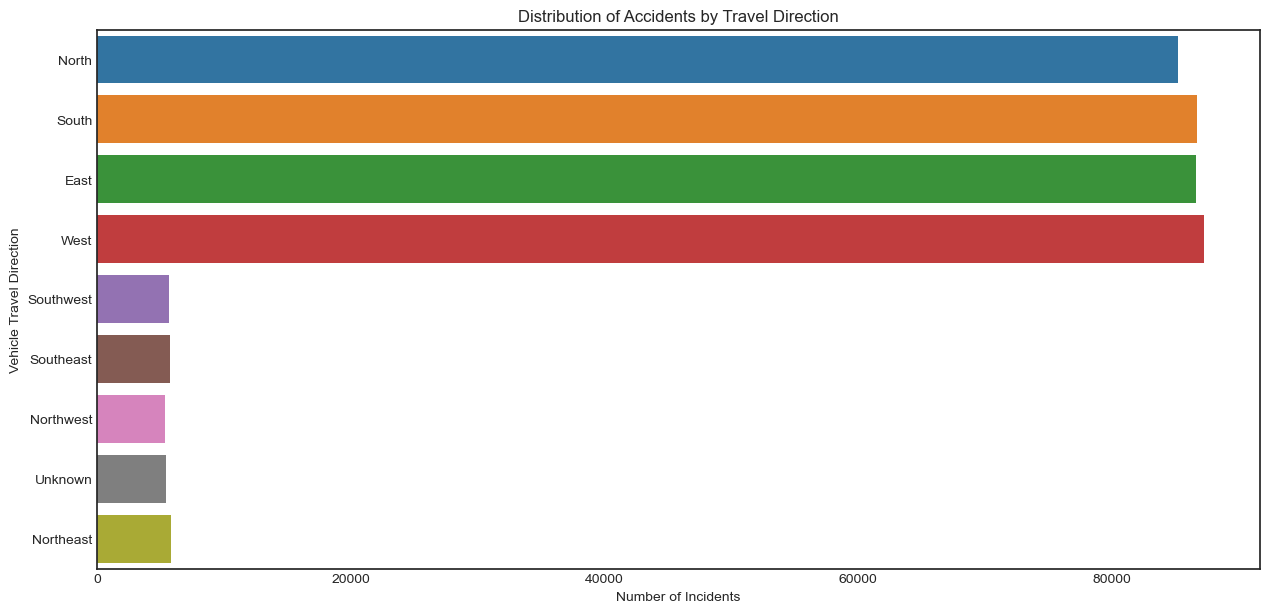

In [67]:
# [EDA] Plot 1: Distribution of travel direction after unspecified values are removed
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_factors[filtergroup],y= 'TRAVEL_DIRECTION')
plt.title("Distribution of Accidents by Travel Direction")
plt.xlabel("Number of Incidents")
plt.ylabel("Vehicle Travel Direction")
plt.show()

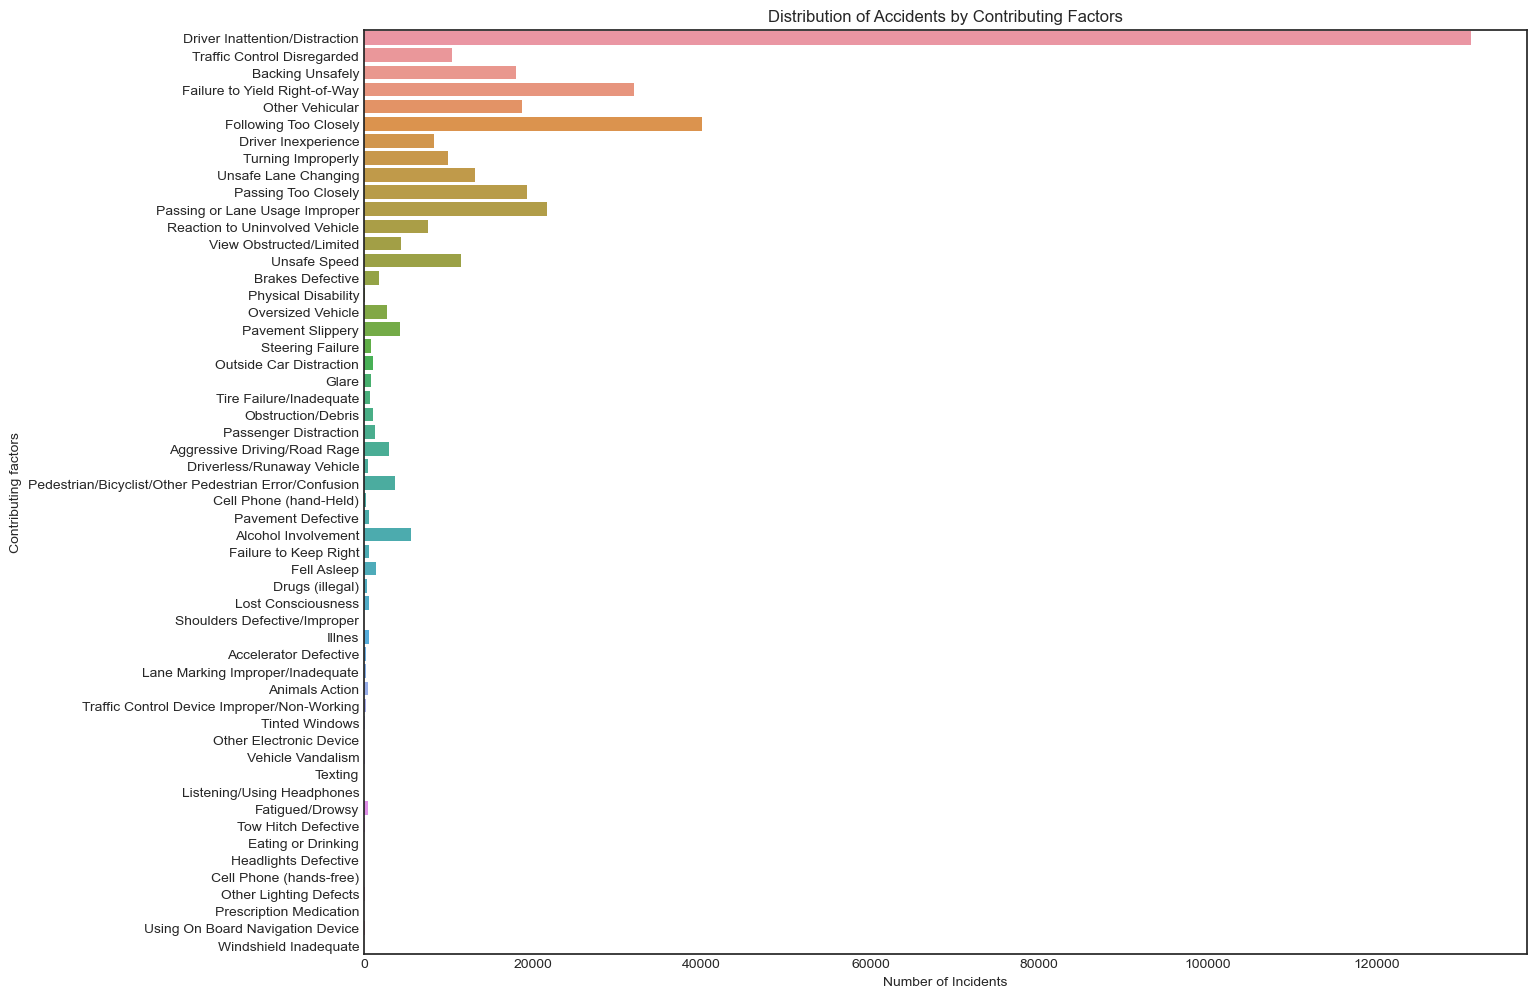

In [66]:
# [EDA] Plot 2: Distribution of Contributing factors without summarizing the categories
plt.figure(figsize=(15,12))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_factors[filtergroup],y= 'CONTRIBUTING_FACTOR_1')
plt.title("Distribution of Accidents by Contributing Factors")
plt.xlabel("Number of Incidents")
plt.ylabel("Contributing factors")
plt.show()

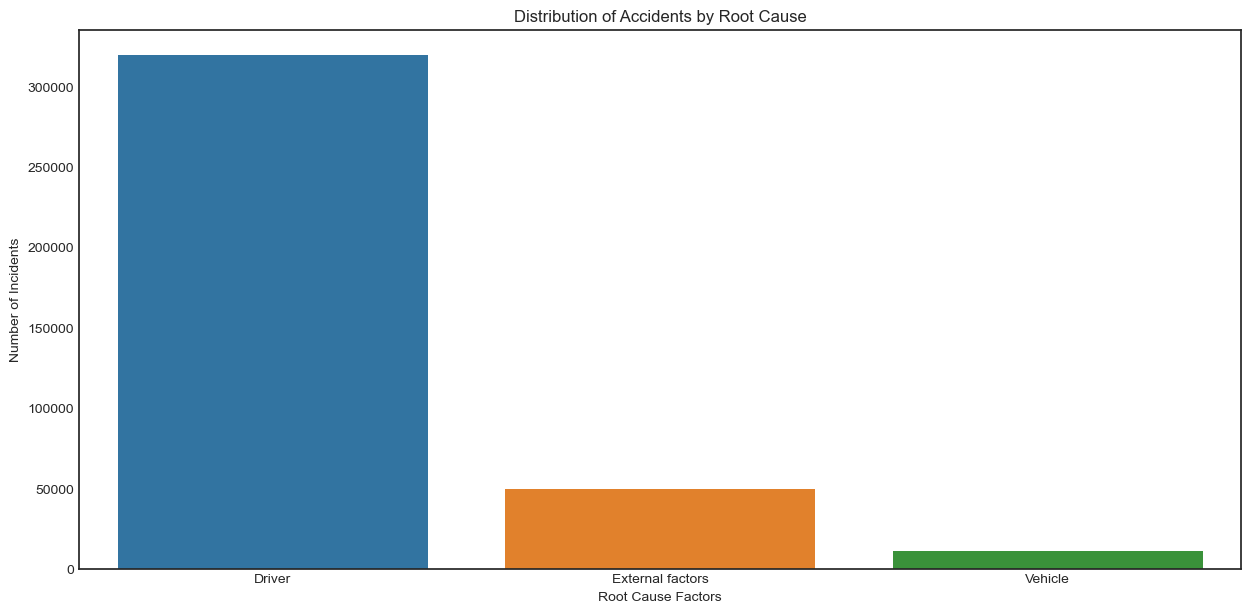

In [68]:
# [Analysis] Plot 3: Distribution of Contributing factors group after summarising the categories
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_factors[filtergroup],x= 'FACTORS_GROUP')
plt.title("Distribution of Accidents by Root Cause")
plt.ylabel("Number of Incidents")
plt.xlabel("Root Cause Factors")
plt.show()

In [69]:
# Problem Statement - 2: What was the status of the car before accidents?

In [107]:
# Retrieving the required columns from the source dataset
df_mvc_crash = df_mvc_update[['PRE_CRASH','POINT_OF_IMPACT','VEHICLE_DAMAGE','VEHICLE_DAMAGE_1','VEHICLE_DAMAGE_2','VEHICLE_DAMAGE_3']]
df_mvc_crash.head()

,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3
0,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN
1,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN
2,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN
3,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage
4,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN


In [108]:
# Count the null values present, if any
df_mvc_crash.isnull().sum()

PRE_CRASH            61675
POINT_OF_IMPACT      63523
VEHICLE_DAMAGE       72357
VEHICLE_DAMAGE_1    342662
VEHICLE_DAMAGE_2    468852
VEHICLE_DAMAGE_3    563746
dtype: int64

In [109]:
# Drops the NA values from the given three columns
df_mvc_crash = df_mvc_crash.dropna(subset=['PRE_CRASH','VEHICLE_DAMAGE','POINT_OF_IMPACT'])
df_mvc_crash

,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3
0,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN
1,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN
2,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN
3,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage
4,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN
...,...,...,...,...,...,...
868826,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage
868827,Parked,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper
868828,Making Right Turn,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN
868829,Going Straight Ahead,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN


In [110]:
# Null values in the given dataset
df_mvc_crash.isnull().sum()

PRE_CRASH                0
POINT_OF_IMPACT          0
VEHICLE_DAMAGE           0
VEHICLE_DAMAGE_1    266132
VEHICLE_DAMAGE_2    391525
VEHICLE_DAMAGE_3    485946
dtype: int64

In [111]:
# Count the total values per column
df_mvc_crash['PRE_CRASH'].value_counts()

Going Straight Ahead          386201
Parked                        156404
Making Left Turn               47675
Making Right Turn              37518
Stopped in Traffic             36671
Slowing or Stopping            25774
Backing                        23047
Changing Lanes                 21169
Starting from Parking          11903
Merging                        11413
Entering Parked Position        9182
Making U Turn                   6914
Passing                         5491
Other*                          4302
Starting in Traffic             2651
Avoiding Object in Roadway       730
Police Pursuit                   218
Making Left Turn on Red          144
Making Right Turn on Red          89
Name: PRE_CRASH, dtype: int64

In [75]:
# Key:value pairs have been used to group the least value columns into a single column

subgroups = {
'Going Straight Ahead' : 'Going Straight Ahead',
'Parked' : 'Parked',
'Making Left Turn' : 'Making Left Turn',
'Making Right Turn' : 'Making Right Turn',
'Stopped in Traffic' : 'Stopped in Traffic',
'Slowing or Stopping' : 'Slowing or Stopping',
'Backing' : 'Backing',
'Changing Lanes' : 'Changing Lanes',
'Starting from Parking' : 'Starting from Parking',
'Merging' : 'Merging',
'Entering Parked Position' : 'Entering Parked Position',
'Making U Turn' : 'Making U Turn',
'Passing' : 'Passing',
'Other*' : 'Other',
'Starting in Traffic' : 'Other',
'Avoiding Object in Roadway' : 'Other',
'Police Pursuit' : 'Other',
'Making Left Turn on Red' : 'Other',
'Making Right Turn on Red' : 'Other'
}

# Create a new column to store the subgroups
df_mvc_crash.loc[:, 'PRE_CRASH_CAUSE'] = df_mvc_crash['PRE_CRASH'].replace(subgroups)

# Display the modified dataset
df_mvc_crash.head()

,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PRE_CRASH_CAUSE
0,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,Going Straight Ahead
1,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,Parked
2,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,Going Straight Ahead
3,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage,Going Straight Ahead
4,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,Going Straight Ahead


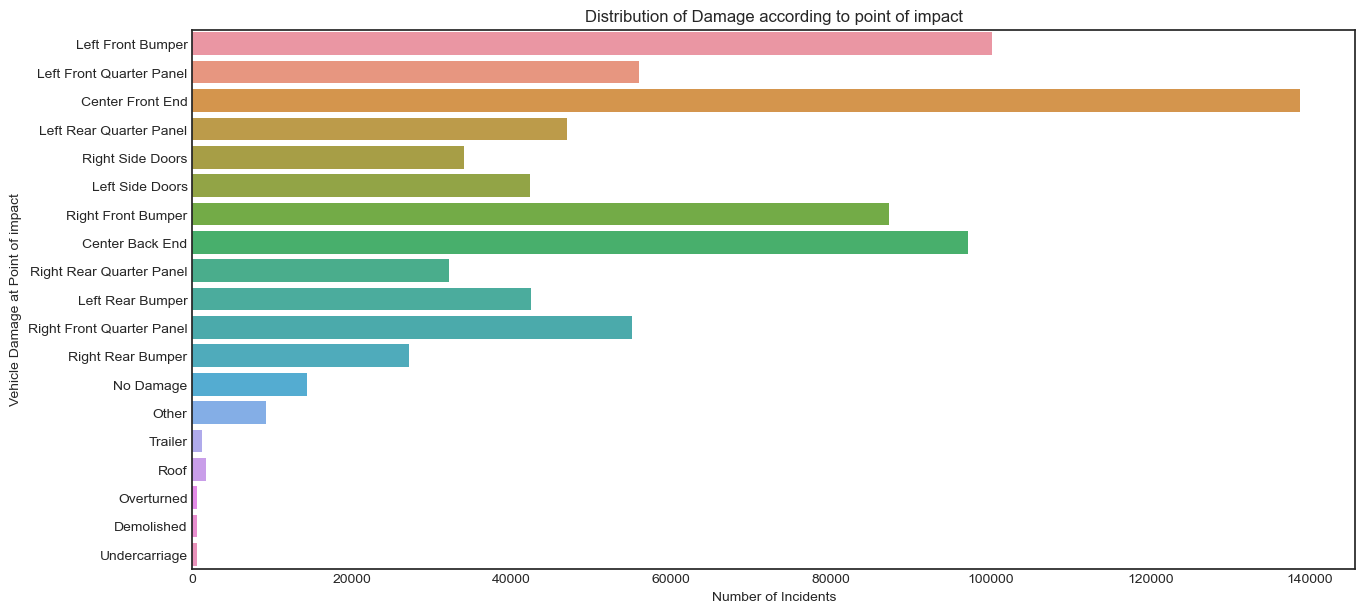

In [79]:
# [EDA] Plot 4: Distribution of point of impact
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_crash,y= 'POINT_OF_IMPACT')
plt.title("Distribution of Damage according to point of impact")
plt.xlabel("Number of Incidents")
plt.ylabel("Vehicle Damage at Point of impact")
plt.show()

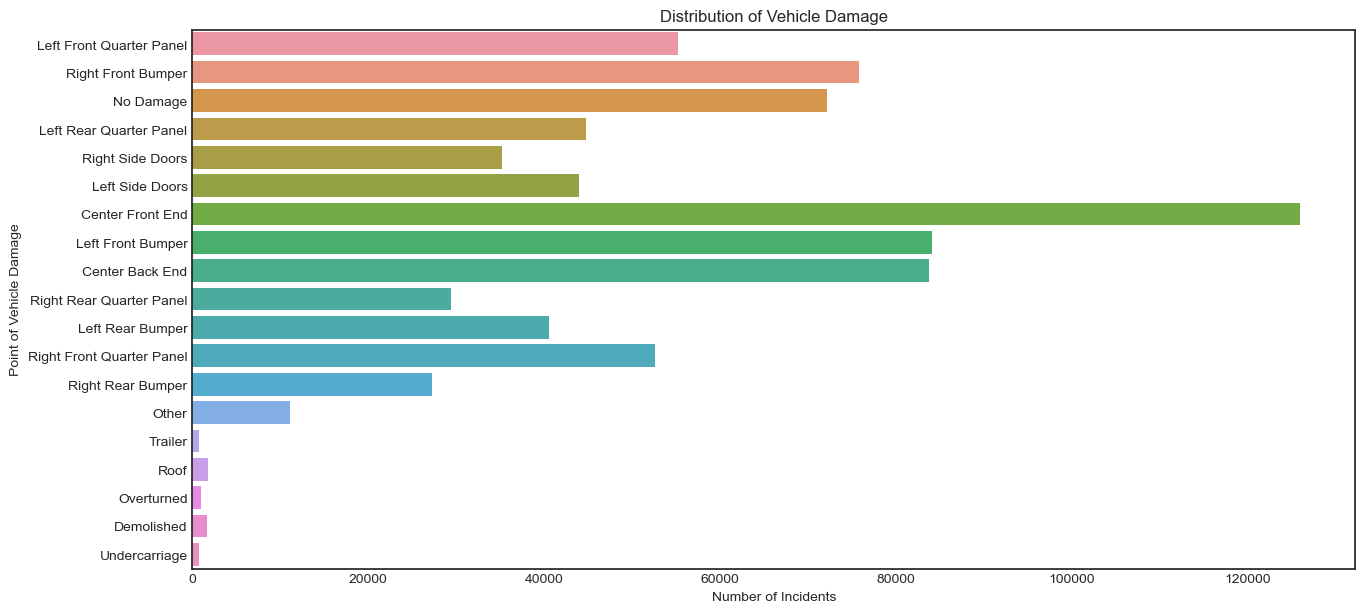

In [80]:
# [EDA] Plot 5: Distribution of Damage according to point of impact
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_crash,y= 'VEHICLE_DAMAGE')
plt.title("Distribution of Vehicle Damage")
plt.xlabel("Number of Incidents")
plt.ylabel("Point of Vehicle Damage")
plt.show()

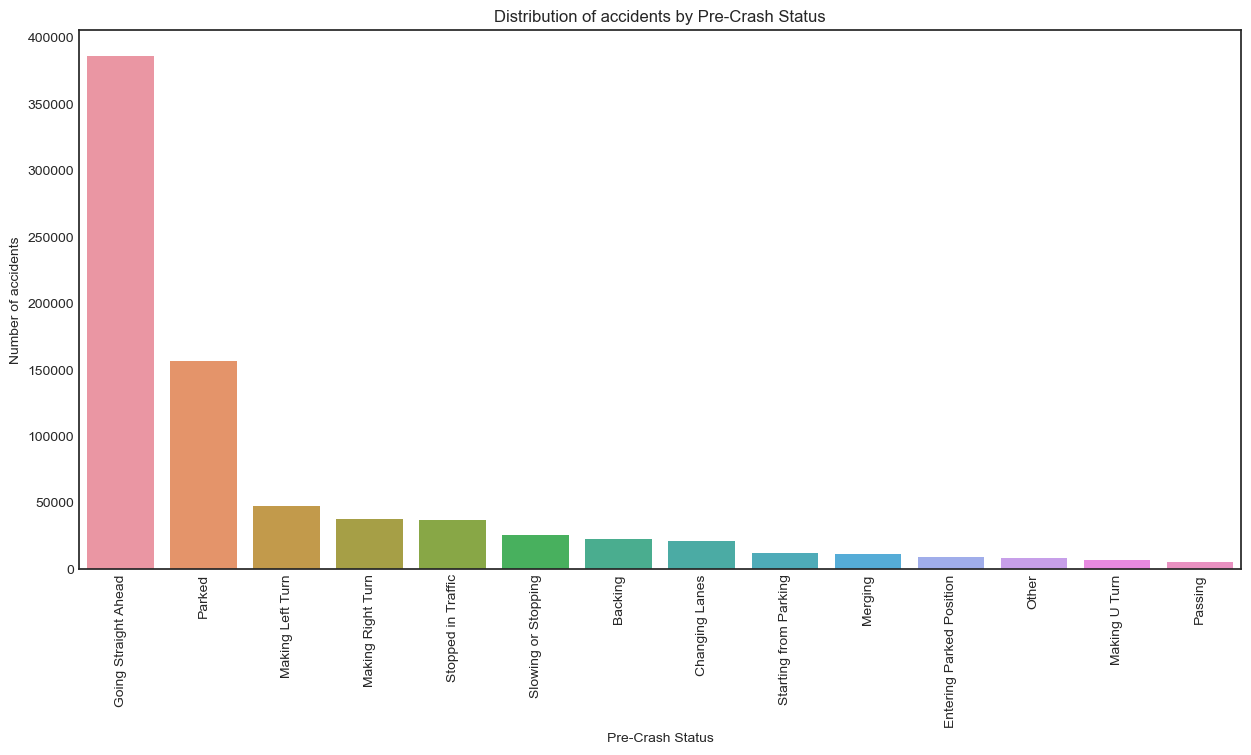

In [76]:
# [EDA] Plot 6: Total accidents by pre-crash status
plt.style.use('seaborn-white')
plt.figure(figsize=(15,7))
plt.title("Distribution of accidents by Pre-Crash Status")
order = df_mvc_crash['PRE_CRASH_CAUSE'].value_counts(ascending=False).index
sns.countplot(x='PRE_CRASH_CAUSE', data=df_mvc_crash, order=order)
plt.xticks(rotation=90)
plt.xlabel("Pre-Crash Status")
plt.ylabel("Number of accidents")
plt.show()

In [ ]:
# Numer of property Damages per accident

In [77]:
# Convert the blanks or "No Damage" to NaN
df_mvc_crash.loc[:, ['VEHICLE_DAMAGE_1','VEHICLE_DAMAGE_2','VEHICLE_DAMAGE_3']] = df_mvc_crash.loc[:, ['VEHICLE_DAMAGE_1','VEHICLE_DAMAGE_2','VEHICLE_DAMAGE_3']].replace('No Damage', np.nan)
df_mvc_crash.head()

,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PRE_CRASH_CAUSE
0,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,Going Straight Ahead
1,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,Parked
2,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,Going Straight Ahead
3,Going Straight Ahead,Center Front End,No Damage,NaN,NaN,NaN,Going Straight Ahead
4,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,Going Straight Ahead


In [78]:
# Count the number of damages for each record
counts = df_mvc_crash[['VEHICLE_DAMAGE_1', 'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3']].count(axis=1)
df_mvc_crash = df_mvc_crash.assign(TOTAL_DAMAGE_COUNT=counts)
df_mvc_crash

,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PRE_CRASH_CAUSE,TOTAL_DAMAGE_COUNT
0,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,Going Straight Ahead,0
1,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,Parked,0
2,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,Going Straight Ahead,2
3,Going Straight Ahead,Center Front End,No Damage,NaN,NaN,NaN,Going Straight Ahead,0
4,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,Going Straight Ahead,0
...,...,...,...,...,...,...,...,...
868826,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,NaN,NaN,Going Straight Ahead,1
868827,Parked,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,Parked,3
868828,Making Right Turn,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,Making Right Turn,1
868829,Going Straight Ahead,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,Going Straight Ahead,2


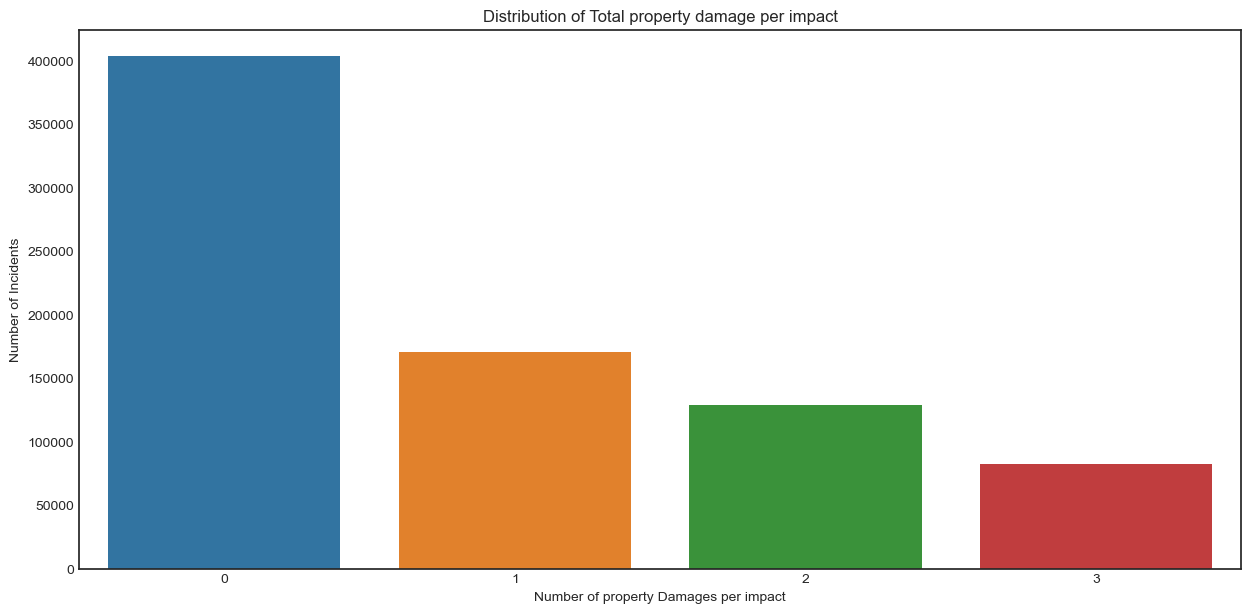

In [82]:
# [Analysis] Plot 7: Distribution of Total number of property damage per impact
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_crash,x= 'TOTAL_DAMAGE_COUNT')
plt.title("Distribution of Total property damage per impact")
plt.ylabel("Number of Incidents")
plt.xlabel("Number of property Damages per impact")
plt.show()

In [83]:
# Problem statement - 3: Relation between time and frequency of car crashes

In [84]:
# Retrieve crash month data from the source dataset
df_mvc_update['CRASH_MONTH'] = pd.DatetimeIndex(df_mvc_update['CRASH_DATE']).month
df_mvc_update['CRASH_MONTH']

0          9
1         10
2         10
3          6
4         10
          ..
868826    10
868827    10
868828    10
868829    10
868830    10
Name: CRASH_MONTH, Length: 868831, dtype: int64

In [85]:
# Retrieving the required columns from the source dataset
df_mvc_time = df_mvc_update[['CRASH_MONTH','CRASH_YEAR','CRASH_DATE','CRASH_TIME']]
df_mvc_time.head()

,CRASH_MONTH,CRASH_YEAR,CRASH_DATE,CRASH_TIME
0,9,2019,09/23/2019,8:15
1,10,2019,10/24/2019,13:15
2,10,2019,10/21/2019,17:55
3,6,2020,06/06/2020,18:30
4,10,2019,10/24/2019,17:30


In [86]:
# Convert the CRASH_TIME column to datetime format
df_mvc_time["CRASH_TIME"] = pd.to_datetime(df_mvc_time["CRASH_TIME"], format="%H:%M")

# Create a function to categorize time into time of day
def get_time_of_day(x):
    if x.hour >= 6 and x.hour < 12:
        return "Morning"
    elif x.hour >= 12 and x.hour < 15:
        return "Afternoon"
    elif x.hour >= 15 and x.hour < 18:
        return "Evening"
    elif x.hour >= 18 and x.hour < 22:
        return "Night"
    else:
        return "Late Night/Early Morning"

# Apply the function to the CRASH_TIME column and create a new column for the time of day
df_mvc_time["TIME_OF_DAY"] = df_mvc_time["CRASH_TIME"].apply(get_time_of_day)

# Print the resulting dataframe
df_mvc_time

C:\Users\ramsu\AppData\Local\Temp\ipykernel_2280\2751406791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvc_time["CRASH_TIME"] = pd.to_datetime(df_mvc_time["CRASH_TIME"], format="%H:%M")
C:\Users\ramsu\AppData\Local\Temp\ipykernel_2280\2751406791.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvc_time["TIME_OF_DAY"] = df_mvc_time["CRASH_TIME"].apply(get_time_of_day)


,CRASH_MONTH,CRASH_YEAR,CRASH_DATE,CRASH_TIME,TIME_OF_DAY
0,9,2019,09/23/2019,1900-01-01 08:15:00,Morning
1,10,2019,10/24/2019,1900-01-01 13:15:00,Afternoon
2,10,2019,10/21/2019,1900-01-01 17:55:00,Evening
3,6,2020,06/06/2020,1900-01-01 18:30:00,Night
4,10,2019,10/24/2019,1900-01-01 17:30:00,Evening
...,...,...,...,...,...
868826,10,2021,10/11/2021,1900-01-01 11:00:00,Morning
868827,10,2021,10/11/2021,1900-01-01 07:15:00,Morning
868828,10,2021,10/11/2021,1900-01-01 00:15:00,Late Night/Early Morning
868829,10,2021,10/11/2021,1900-01-01 22:10:00,Late Night/Early Morning


In [88]:
# Check for the null values
df_mvc_time['TIME_OF_DAY'].isna().sum()

0

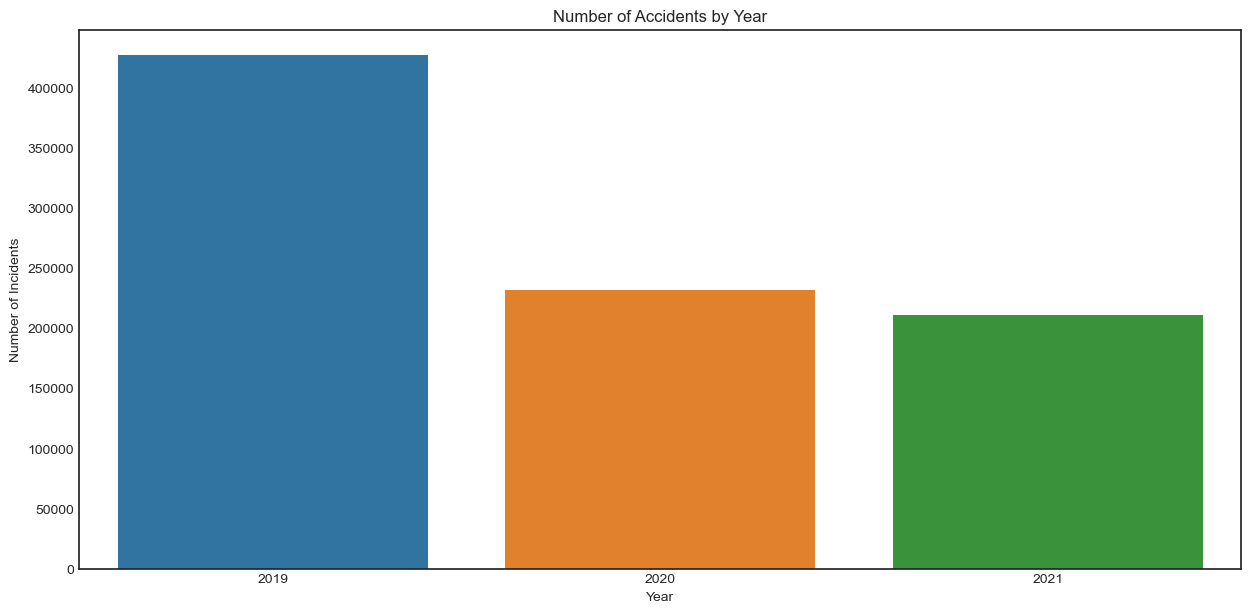

In [91]:
# [EDA] Plot 8: Number of Accidents by Year
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_time,x= 'CRASH_YEAR')
plt.title("Number of Accidents by Year")
plt.ylabel("Number of Incidents")
plt.xlabel("Year")
plt.show()

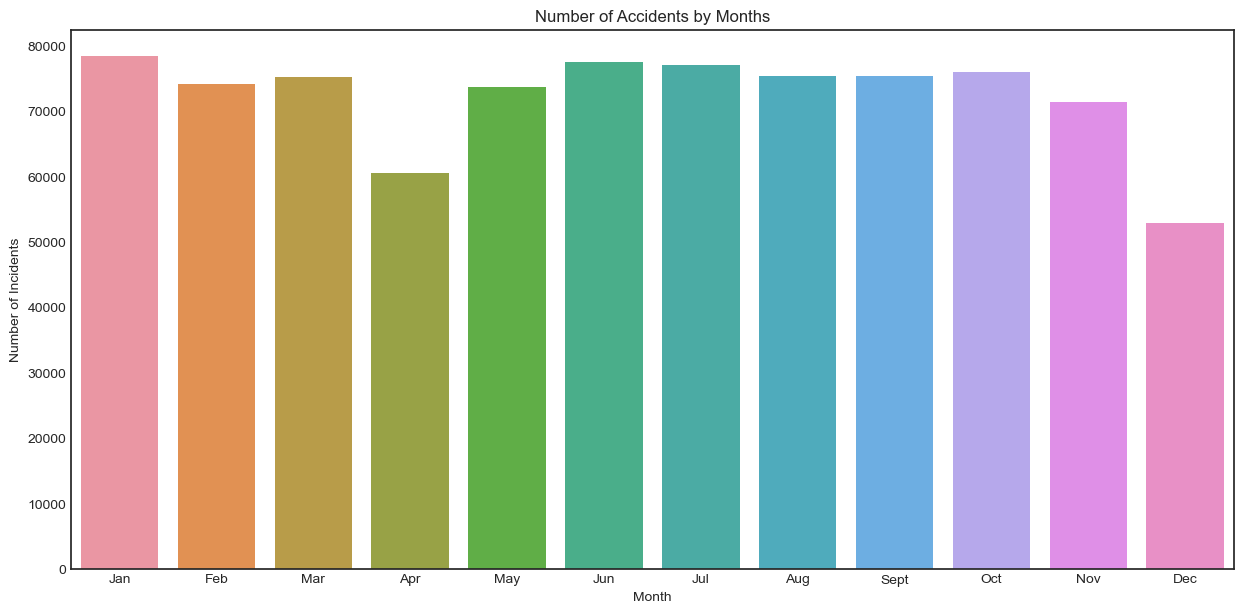

In [92]:
# [EDA] Plot 9: Number of Accidents per Month
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_time,x= 'CRASH_MONTH')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"])
plt.title("Number of Accidents by Months")
plt.ylabel("Number of Incidents")
plt.xlabel("Month")
plt.show()

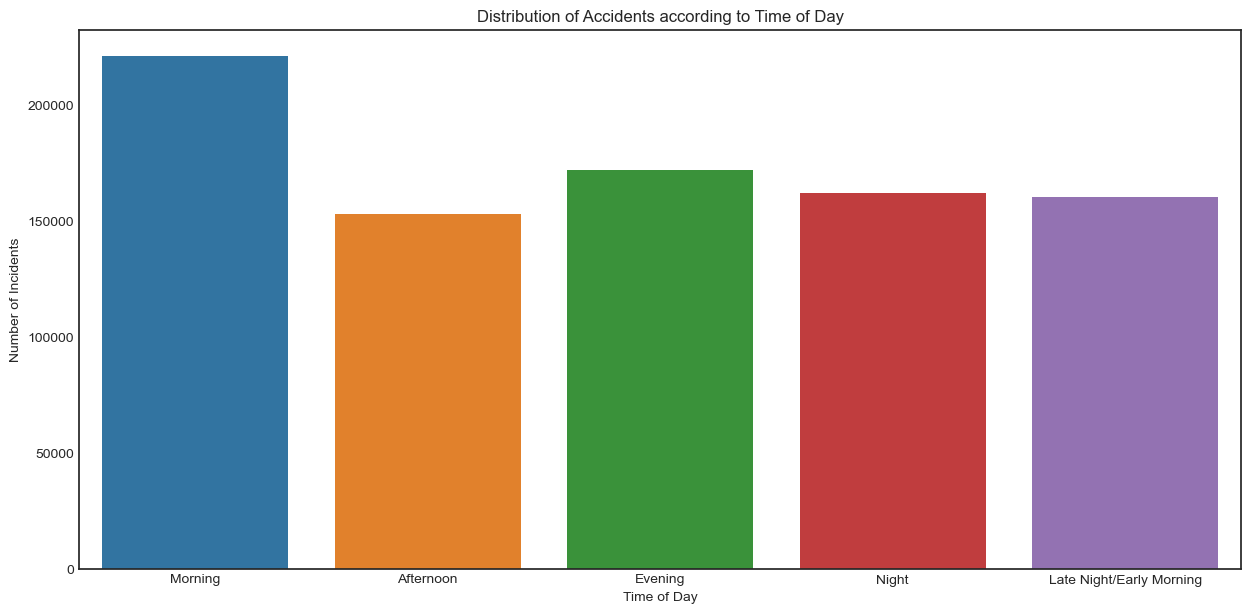

In [90]:
# [Analysis] Plot 10: Distribution of Accidents according to time of day
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_time,x= 'TIME_OF_DAY')
plt.title("Distribution of Accidents according to Time of Day")
plt.ylabel("Number of Incidents")
plt.xlabel("Time of Day")
plt.show()

C:\Users\ramsu\AppData\Local\Temp\ipykernel_2280\2890405782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvc_time.loc[:, 'CRASH_MONTH'] = df_mvc_time['CRASH_MONTH'].replace(month_dict)


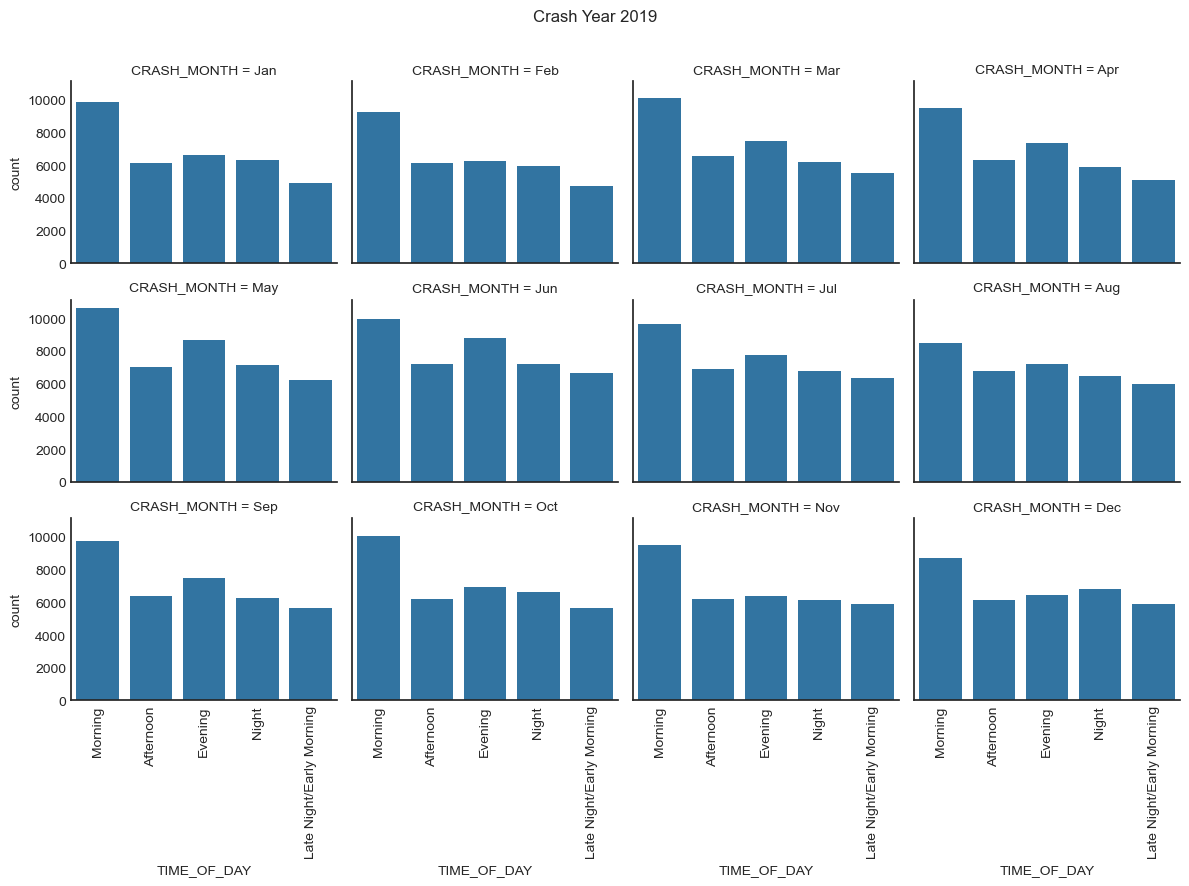

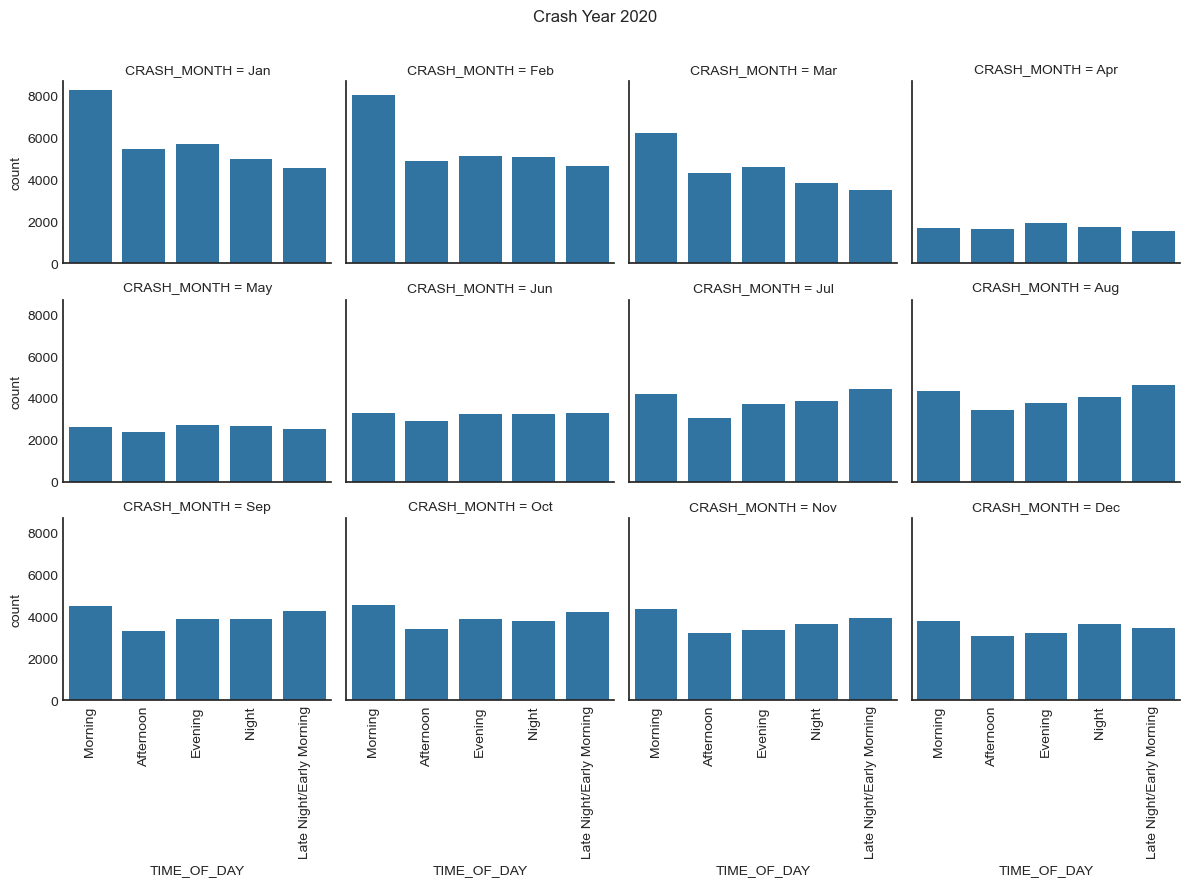

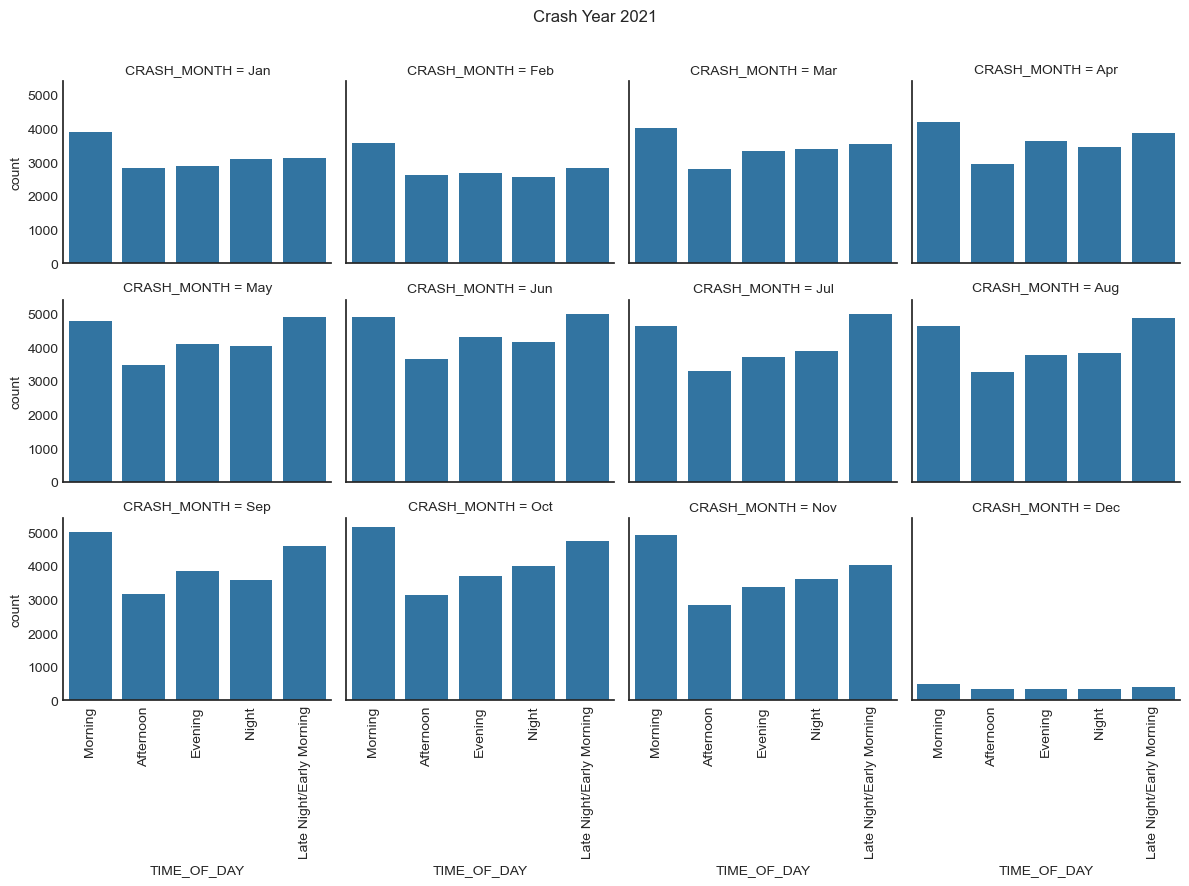

In [102]:
# [Analysis] Plot 11 : Facet plot indicating accident rates across different years and months

# create a dictionary to map month numbers to month names
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# replace month numbers with month names
df_mvc_time.loc[:, 'CRASH_MONTH'] = df_mvc_time['CRASH_MONTH'].replace(month_dict)

# create three facet grids, one for each year
for year in df_mvc_time['CRASH_YEAR'].unique():
    year_df = df_mvc_time[df_mvc_time['CRASH_YEAR'] == year]
    
    # create a facet grid for each year
    g = sns.FacetGrid(year_df, col='CRASH_MONTH', col_wrap=4, col_order=list(month_dict.values()))
    g.set_xticklabels(rotation=90)
    
    # add a bar plot for time of day
    g.map(sns.countplot, 'TIME_OF_DAY', order=['Morning', 'Afternoon', 'Evening', 'Night','Late Night/Early Morning'])
    
    
    # set the title for each facet grid
    g.fig.suptitle(f'Crash Year {year}')
    
    # adjust the spacing between plots
    g.fig.subplots_adjust(top=0.9)
    

    # display the plot
    plt.show()